In [60]:
import matplotlib.pyplot as plt
import numpy as np
import vedo

from histalign.backend.ccf.paths import get_atlas_path
from histalign.backend.io import load_volume
from histalign.backend.models import Resolution

vedo.settings.default_backend = "vtk"

In [2]:
def show(x) -> None:
    plotter = vedo.Plotter(axes=9)

    plotter += x

    camera = dict(
        position=(
            -x.dimensions()[0] * 2,
            x.dimensions()[1] // 2,
            x.dimensions()[2] // 2,
        ),
        focal_point=np.array(x.dimensions()) // 2,
        viewup=(0, -1, 0),
    )

    plotter.show(camera=camera, interactive=False).interactive().close()

In [3]:
atlas_path = get_atlas_path(Resolution.MICRONS_100)
aligned_path = "/home/ediun/.local/share/histalign/alignment_volumes/7a3eddb96983e3998085ecf60379031b.npz"
interpolated_path = "/home/ediun/.local/share/histalign/interpolated_volumes/7a3eddb96983e3998085ecf60379031b.npz"

In [4]:
atlas_array = load_volume(atlas_path, return_raw_array=True)
aligned_array = np.load(aligned_path)["array"]
interpolated_array = np.load(interpolated_path)["array"]

In [5]:
atlas_volume = vedo.Volume(atlas_array)
aligned_volume = vedo.Volume(aligned_array)
interpolated_volume = vedo.Volume(interpolated_array)

In [6]:
show(atlas_volume)

In [7]:
show(aligned_volume)

In [20]:
interpolated_array.dtype

dtype('float64')

In [80]:
# masked_array = interpolated_array / np.max(np.abs(interpolated_array)) * 2**15 - 1
# masked_array += 2**15
# masked_array = masked_array.astype(np.uint16)
masked_array = np.where(atlas_array > 5, interpolated_array, 0)
masked_volume = vedo.Volume(masked_array)
masked_volume.cmap(c="grey", vmin=0, alpha=[0, 0.5])
show(masked_volume)

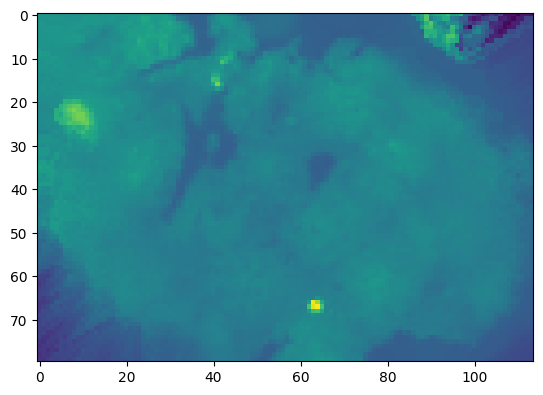

In [81]:
plt.imshow(interpolated_array[53])